In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from godotbridge import GodotBridge

In [28]:
robot = GodotBridge(4242)

In [3]:
def euler_integration(t, z0, u, params):
    v = 0.5 * params[0] * (u[0] + u[1])
    omega = params[0]/(2*params[1]) * (u[0] - u[1])
    delta = t[1] - t[0]

    x0 = z0[0]
    y0 = z0[1]
    theta0 = z0[2]

    x1 = x0 + v*math.cos(theta0 + math.pi/2) * delta
    y1 = y0 + v*math.sin(theta0 + math.pi/2) * delta
    theta1 = theta0 + omega * delta

    z1 = [x1, y1, theta1]
    return z1

In [4]:
def forward_kinematics(z0, t, u, params):
    
    z = np.array([z0])

    for i in range(0, len(t)-1):
        z0 = euler_integration([t[i], t[i+1]], z0, [u[i, 0], u[i, 1]], params)
        z = np.vstack([z, z0])  # concatenates vertically [[x, y, theta],
                            # [x0, y0, theta0], etc ...]

    return z


In [29]:
# Activate Robot
robot.call("run")

# Robot characteristics
r = 0.05    # radius of wheel
b = 0.12    # center-wheel distance
right_rot_vel = 0
left_rot_vel = 0

# initial condition [x0, y0, theta0]
z0 = robot.call("get_localisation")

t1 = np.arange(0, 1, 0.1)
t2 = np.arange(1, 2, 0.1)
t3 = np.arange(2, 3, 0.1)
t = np.append(t1, t2)
t = np.append(t, t3)
vel = np.zeros((len(t), 2)) # use for right wheel velocity (index 0) and left (index 1)

for i in range(0, len(t1)):
    vel[i, 0] = 4 # right wheel velocity
    vel[i, 1] = 4 # left wheel velocity

for i in range(len(t1), len(t1)+len(t2)):
    vel[i, 0] = 4
    vel[i, 1] = 2

for i in range(len(t1)+ len(t2), len(t)):
    vel[i, 0] = 4
    vel[i, 1] = 4

params = [r, b]
z_model = forward_kinematics(z0, t, vel, params)

z = np.array([z0])
loop = True
# initial state
state = 1

start_time = time.time()
is_actived = False

while loop:
    if state == 0:
        if not is_actived:
            # print(robot.call("get_localisation"))
            robot.call("set_right_wheel_vel", 0)
            robot.call("set_left_wheel_vel", 0)
            is_actived = True
            print("State 0")
            loop = False

    elif state == 1:
        if not is_actived:
            # print(robot.call("get_localisation"))
            robot.call("set_right_wheel_vel", 4)
            robot.call("set_left_wheel_vel", 4)
            is_actived = True
            start_time = time.time()
            print("State 1")
        elif elapsed_time > 1:
            state = 2
            is_actived = False

        # z = np.vstack([z, robot.call("get_localisation")])

    elif state == 2:
        if not is_actived:
            # print(robot.call("get_localisation"))
            robot.call("set_right_wheel_vel", 4)
            robot.call("set_left_wheel_vel", 2)
            is_actived = True
            start_time = time.time()
            print("State 2")
        elif elapsed_time > 1:
            state = 3
            is_actived = False

        # z = np.vstack([z, robot.call("get_localisation")])

    elif state == 3:
        if not is_actived:
            # print(robot.call("get_localisation"))
            robot.call("set_right_wheel_vel", 4)
            robot.call("set_left_wheel_vel", 4)
            is_actived = True
            start_time = time.time()
            print("State 3")
        elif elapsed_time > 1:
            state = 0
            is_actived = False

        # z = np.vstack([z, robot.call("get_localisation")])

    z = np.vstack([z, robot.call("get_localisation")])
    elapsed_time = time.time() - start_time

print("End loop")

robot.call("set_right_wheel_vel", 0)
robot.call("set_left_wheel_vel", 0)
robot.call("stop")


State 1
State 2
State 3
State 0
End loop


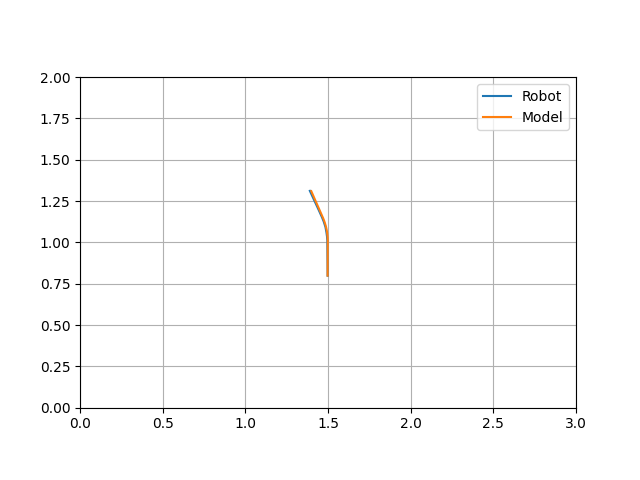

In [30]:
plt.figure()
plt.plot(z[:, 0], z[:, 1], label="Robot")
plt.plot(z_model[:, 0], z_model[:, 1], label="Model")
plt.xlim(0,3)
plt.ylim(0,2)
plt.legend()
plt.grid(True)
plt.gca().set_aspect("equal")
plt.show()